<a href="https://colab.research.google.com/github/muchiriben/ArtificialIntelligenceCat2/blob/main/group11_cat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: A Decision Tree model for detecting breast cancer


In [24]:
#import libraries

# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer

# visualizing 
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [25]:
#loading the data set
data = load_breast_cancer()

Let's have a look at the features, the names of the classes (only 2), the size of the data set and the first example from the data set

In [26]:
# The shape of the data matrix (without class attribute)
print("Matrix shape: " + repr(data.data.shape))
# The names of the features
print("The data set has the following features:")
pprint(data.feature_names)
# The names of the classes
print("The data set has the following classes:")
pprint(data.target_names)
# The first example from the data set
print("The first example from the data set:")
pprint(data.data[1])

Matrix shape: (569, 30)
The data set has the following features:
array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')
The data set has the following classes:
array(['malignant', 'benign'], dtype='<U9')
The first example from the data set:
array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3

In [27]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target,shuffle=True,test_size=0.3, random_state=42)

In [28]:
# X_train - matrix with features for the training data
# X_test - matrix with features for the testing data
# y_train - vector with the labels (true labels) for the training data set
# y_test - vector with the labels (true labels) for the test data set

Training the classifier

In [29]:
# DECISION TREE
# initialize the model with standard parameters
clf_dt = DecisionTreeClassifier(criterion="entropy")
# train the model
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Making predictions for unseen data and evaluate how well it does.
We first let it make predictions on the test data set X_test and then we compare the labels the tree predicted y_test_pred with the true labels y_test. And we count how often they agree, which gives us the accuracy of the decision tree. We do the same for the training data.


In [30]:
# Evaluating on the test data
y_test_pred = clf_dt.predict(X_test);
a_dt_test = accuracy_score(y_test, y_test_pred);

# Evaluating on the training data
y_train_pred = clf_dt.predict(X_train);
a_dt_train = accuracy_score(y_train, y_train_pred);

print("Training data accuracy is " +  repr(a_dt_train) + " and test data accuracy is " + repr(a_dt_test))

Training data accuracy is 1.0 and test data accuracy is 0.9707602339181286


Visualizing/plotting the decision tree

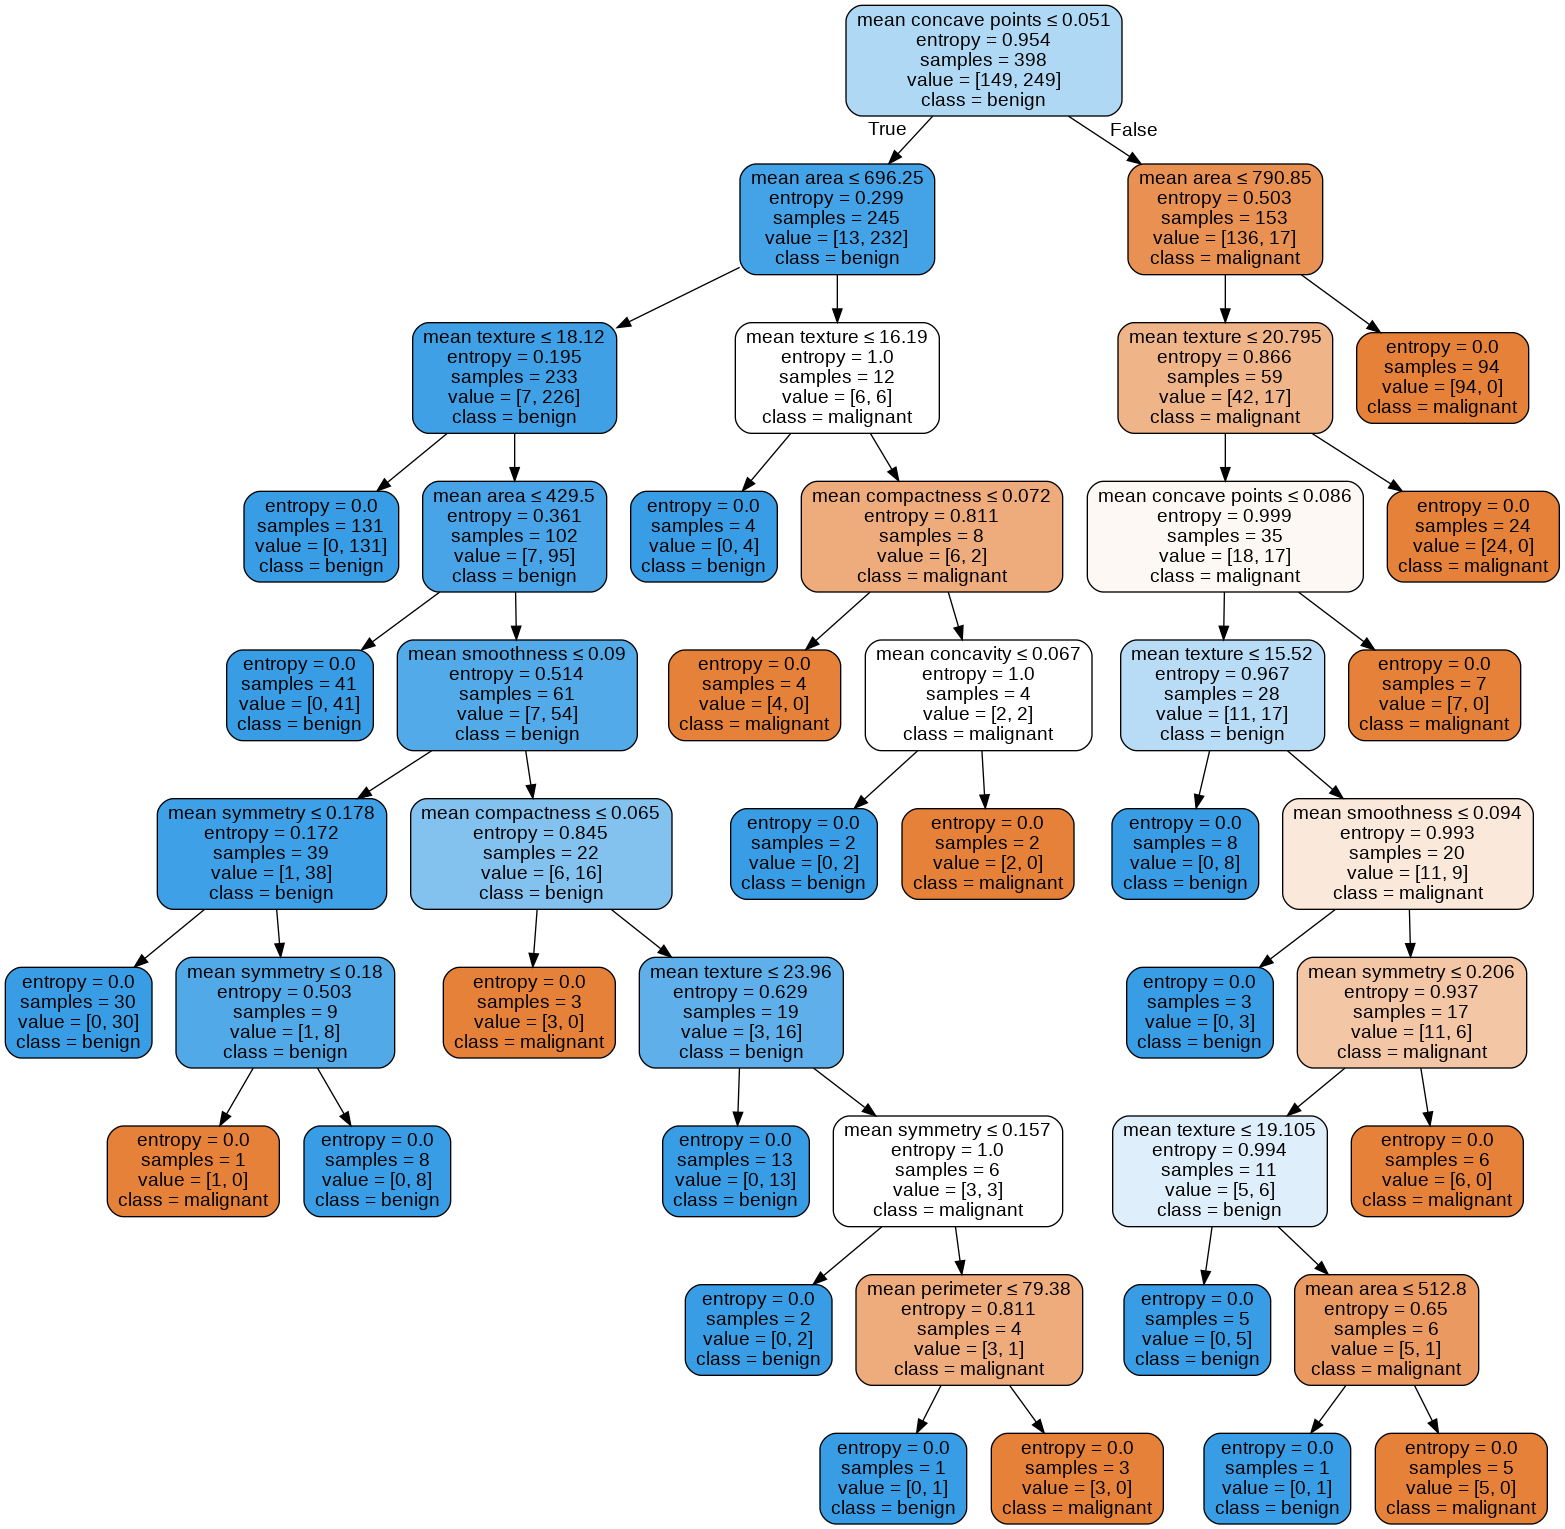

In [31]:
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,
                feature_names=data.feature_names[0:9],  
                class_names=data.target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())